In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/synthetic_session1.csv", parse_dates=["timestamp"])
df.head()


,timestamp,battery_percent,cpu_pct,screen_on,drain_per_min,minutes_remaining_target
0,2025-12-03 19:18:39.320908,94.478,24.97,1,0.5216,378
1,2025-12-03 19:19:39.320926,93.924,18.62,1,0.5544,377
2,2025-12-03 19:20:39.320931,93.830,26.48,0,0.0944,379
3,2025-12-03 19:21:39.320934,93.695,35.23,0,0.1348,377
4,2025-12-03 19:22:39.320938,93.618,17.66,0,0.0765,376


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 300 non-null    datetime64[ns]
 1   battery_percent           300 non-null    float64       
 2   cpu_pct                   300 non-null    float64       
 3   screen_on                 300 non-null    int64         
 4   drain_per_min             300 non-null    float64       
 5   minutes_remaining_target  300 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 14.2 KB


,timestamp,battery_percent,cpu_pct,screen_on,drain_per_min,minutes_remaining_target
count,300,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2025-12-03 21:48:09.321413632,59.635863,20.007433,0.343333,0.250135,224.823333
min,2025-12-03 19:18:39.320908,19.960000,0.000000,0.000000,0.024200,73.000000
25%,2025-12-03 20:33:24.321168128,40.760500,13.167500,0.000000,0.087675,150.750000
50%,2025-12-03 21:48:09.321416448,61.978500,20.590000,0.000000,0.114850,221.500000
75%,2025-12-03 23:02:54.321658880,76.778000,26.270000,1.000000,0.533725,303.000000
max,2025-12-04 00:17:39.321904,94.478000,58.530000,1.000000,0.610100,379.000000
std,NaN,21.401346,9.680031,0.475615,0.216528,88.770450


In [4]:
df.isna().sum()


timestamp                   0
battery_percent             0
cpu_pct                     0
screen_on                   0
drain_per_min               0
minutes_remaining_target    0
dtype: int64

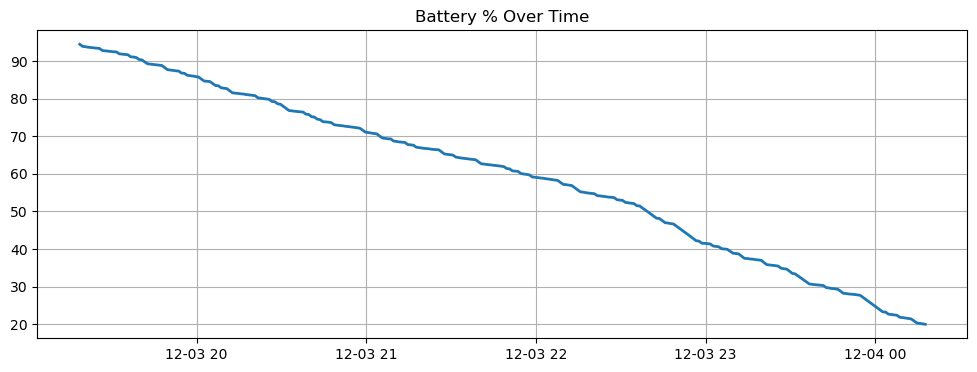

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['timestamp'], df['battery_percent'], linewidth=2)
plt.title("Battery % Over Time")
plt.grid(True)
plt.show()


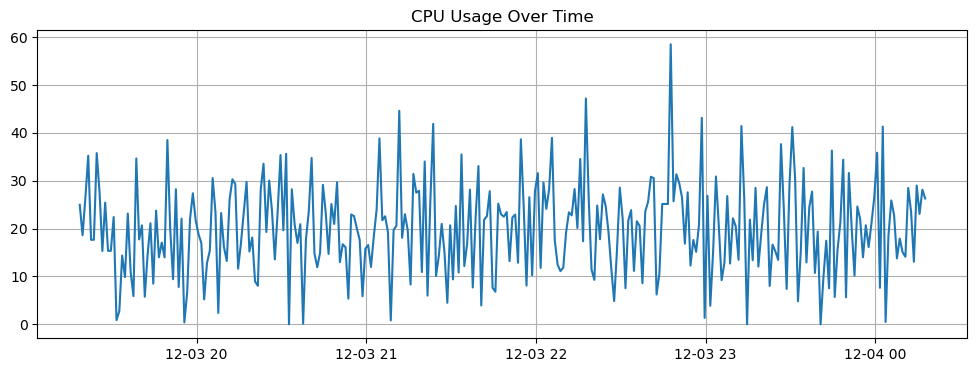

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df['timestamp'], df['cpu_pct'])
plt.title("CPU Usage Over Time")
plt.grid(True)
plt.show()


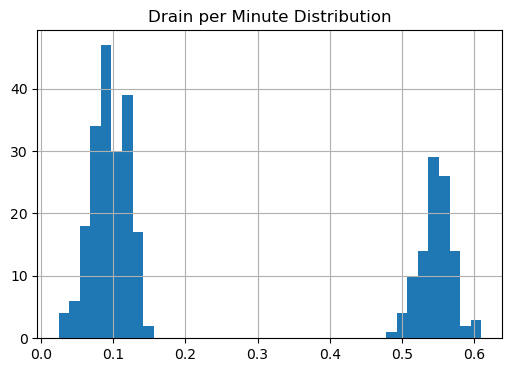

In [7]:
df['drain_per_min'].hist(bins=40, figsize=(6,4))
plt.title("Drain per Minute Distribution")
plt.grid(True)
plt.show()


In [8]:
df.corr(numeric_only=True)


,battery_percent,cpu_pct,screen_on,drain_per_min,minutes_remaining_target
battery_percent,1.000000,-0.062314,-0.118722,-0.128591,0.985224
cpu_pct,-0.062314,1.000000,0.100796,0.166948,-0.063877
screen_on,-0.118722,0.100796,1.000000,0.993653,-0.134966
drain_per_min,-0.128591,0.166948,0.993653,1.000000,-0.143884
minutes_remaining_target,0.985224,-0.063877,-0.134966,-0.143884,1.000000


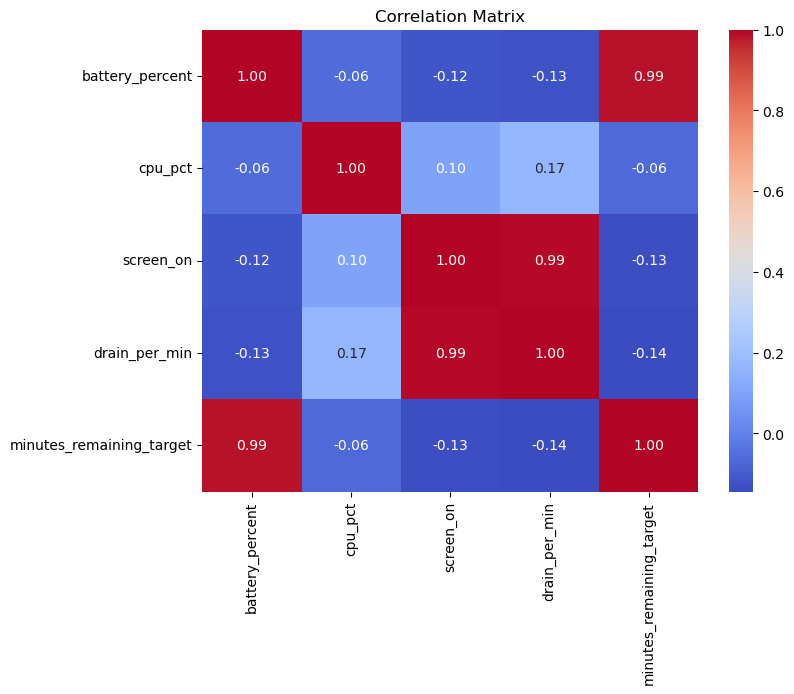

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [10]:
df['roll_drain_5'] = df['drain_per_min'].rolling(5, min_periods=1).mean()
df['roll_drain_10'] = df['drain_per_min'].rolling(10, min_periods=1).mean()
df['roll_cpu_5'] = df['cpu_pct'].rolling(5, min_periods=1).mean()


In [11]:
df['roll_screen_5'] = df['screen_on'].rolling(5, min_periods=1).mean()


In [13]:
from sklearn.model_selection import train_test_split

features = ['battery_percent','cpu_pct','screen_on','drain_per_min',
            'roll_drain_5','roll_drain_10','roll_cpu_5','roll_screen_5']

X = df[features]
y = df['minutes_remaining_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred)

mae_lr


30.501765148374776

In [16]:
print("Baseline Global MAE:", mae_global)
print("Baseline Rolling MAE:", mae_rolling)
print("Linear Regression MAE:", mae_lr)


NameError: name 'mae_global' is not defined

In [17]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

df = pd.read_csv("../data/synthetic_session1.csv")

avg_drain_global = df['drain_per_min'].mean()
df['baseline_global'] = (df['battery_percent'] / avg_drain_global).round()

mae_global = mean_absolute_error(df['minutes_remaining_target'], df['baseline_global'])

mae_global


16.11

In [18]:
N = 10

df['rolling_avg_drain'] = df['drain_per_min'].rolling(window=N, min_periods=1).mean()
df['baseline_rolling'] = (df['battery_percent'] / df['rolling_avg_drain']).replace([np.inf, -np.inf], np.nan).fillna(0).round()

mae_rolling = mean_absolute_error(df['minutes_remaining_target'], df['baseline_rolling'])

mae_rolling


71.56333333333333

In [19]:
print("Baseline Global MAE:", mae_global)
print("Baseline Rolling MAE:", mae_rolling)
print("Linear Regression MAE:", mae_lr)


Baseline Global MAE: 16.11
Baseline Rolling MAE: 71.56333333333333
Linear Regression MAE: 30.501765148374776
